<a href="https://colab.research.google.com/github/yiran597/statistics_analysis/blob/main/%E4%B8%BB%E9%A2%98%E6%A8%A1%E5%9E%8B2_0_with_vader_sentiment_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 主题模型2.0: 情感分析和主题建模
## 用主题模型分析具体有情感分析指标的数据集
目的：在已经筛选出正向评论后，可以使用 主题建模（例如 LDA）来提取这些评论中的主题，了解客户对哪些方面的产品或服务表达了最强的正面情感。

举例：通过 LDA 或 NMF（非负矩阵分解）对评论进行建模，提取出代表产品特点或品牌优势的主题（如“舒适”、“高质量”、“漂亮”等）。

作用：这些主题可以为你提供 产品亮点，例如：如果很多评论都提到产品的“舒适性”或“设计”，这可能是推广产品时的一个卖点。

In [ ]:
## Load function, Update Environment
import sys

!{sys.executable} -m pip install numpy
import numpy as np

!{sys.executable} -m pip install sklearn
from sklearn import metrics

!{sys.executable} -m pip install pandas
import pandas as pd

!{sys.executable} -m pip install nltk
import nltk

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.lda_model

  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 21.1 MB/s eta 0:00:00


In [ ]:
#Connect to My Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# load dataset
VPreview = pd.read_csv("/content/drive/MyDrive/lilysilk/Data/VPcomments_with_vader_Youtube.csv")
VPreview.head(3)

,Review,VADER Score
0,beautiful haul irene purple top pretty look aw...,0.9829
1,congrats haul irene lily silk packaging pretty...,0.9821
2,fab video love calvi use load exact colour mj ...,0.9601


In [ ]:
reviews = VPreview.Review
scores = VPreview['VADER Score']

import pickle
with open('Review.pickle','wb') as f:
    pickle.dump(reviews,f)

with open('sent.pickle','wb') as f:
    pickle.dump(scores,f)

reviews_in = open('Review.pickle','rb')
scores_in = open('sent.pickle','rb')
reviews = pickle.load(reviews_in)
scores = pickle.load(scores_in)

# Creating the corpus
import re
reviews_corpus = []
for i in range(0, len(reviews)):
    review = re.sub(r'\W', ' ', str(reviews[i]))
    review = review.lower()
    review = re.sub(r'^br$', ' ', review)
    review = re.sub(r'\s+[a-z]\s+', ' ',review)
    review = re.sub(r'^[a-z]\s+', '', review)
    review = re.sub(r'\s+', ' ', review)
    reviews_corpus.append(review)

In [ ]:
# Define the text normalization function
%run "/content/drive/MyDrive/lilysilk/Text_Normalization_Function.ipynb"

  Preparing metadata (setup.py) ... done
  Created wheel for html.parser: filename=html_parser-0.2-py3-none-any.whl size=1286 sha256=796c6934550935c3359f6039b164529002b73078b6d88049dd439ec2665f36e2
  Stored in directory: /root/.cache/pip/wheels/9e/aa/98/502b17f7b11e03dfd35a42c1fa4cda6220762f34a90af79904
Successfully built html.parser


[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 23.7/23.7 MB 44.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.8/349.8 kB 22.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.3/81.3 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 66.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.8/100.8 kB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.8/144.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.8/104.8 kB 7.8 MB/s eta 0:00:00
  Created wheel for pattern3: filename=pattern3-3.0.0-py2.py3-none-any.whl size=18554332 sha256=35acf8da5db0bb2552580f753c47e8592b364fc991875e7e2ed57fa428bf1ccd
  Stored in directory: /root/.cache/pip/wheels/0c/3b/9e/e2c0eb8db016f849b64ef1

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  ['<', 'p', '>', 'The', 'circus', 'dog', 'in', 'a', 'plissé', 'skirt', 'jumped', 'over', 'Python', 'who', 'was', "n't", 'that', 'large', ',', 'just', '3', 'feet', 'long.', '<', '/p', '>']
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  <p>The circus dog in a plissé skirt jumped over Python who was not that large, just 3 feet long.</p>


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger_eng.zip.


Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  [('<', 'a'), ('p', 'n'), ('>', 'v'), ('the', None), ('circus', 'n'), ('dog', 'n'), ('in', None), ('a', None), ('plissé', 'n'), ('skirt', 'n'), ('jumped', 'v'), ('over', None), ('python', 'n'), ('who', None), ('was', 'v'), ("n't", 'r'), ('that', None), ('large', 'a'), (',', None), ('just', 'r'), ('3', None), ('feet', 'n'), ('long.', 'a'), ('<', 'n'), ('/p', 'n'), ('>', 'n')]
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:  < p > the circus dog in a plissé skirt jump over python who be n't that large , just 3 foot long. < /p >
Original:   <p>The circus dog in a plissé skirt jumped over Python who wasn't that large, just 3 feet long.</p>
Processed:    p   The circus dog in a plissé skirt jumped over Python who was n t that large   just 3 feet long     p  
Original:   <p>The circus dog in a pli

In [ ]:
NORM_reviews = normalize_corpus(VPreview.Review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_features=1000)
bow_a_corpus = bow_vectorizer.fit_transform(NORM_reviews)

### ***LDA Analysis***

In [ ]:
lda_reviews = LatentDirichletAllocation(n_components=6, max_iter=100,
                                     doc_topic_prior = 0.25,
                                     topic_word_prior = 0.25).fit(bow_a_corpus)

In [ ]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))

def get_topic_words(vectorizer, lda_model, n_words):
    keywords = np.array(vectorizer.get_feature_names_out())
    topic_words = []
    for topic_weights in lda_model.components_:
        top_word_locs = (-topic_weights).argsort()[:n_words]
        topic_words.append(keywords.take(top_word_locs).tolist())
    return topic_words

In [ ]:
no_top_words_news = 10
display_topics(lda_reviews, bow_vectorizer.get_feature_names_out(), no_top_words_news)

Topic 0:
like day lot love thing year every video wear use
Topic 1:
hair http lilysilk com ly code silk use ml magik
Topic 2:
love look dress silk beautiful outfit white style wear like
Topic 3:
love look great video good well thank like always lovely
Topic 4:
money people look beautiful woman old style way healthy want
Topic 5:
love happy birthday beautiful much thank look great wonderful video


In [ ]:
word_weights = lda_reviews.components_ / lda_reviews.components_.sum(axis=1)[:, np.newaxis]
word_weights_df = pd.DataFrame(word_weights.T,
                               index = bow_vectorizer.get_feature_names_out(),
                               columns = ["Topic_" + str(i) for i in range(6)])
print(word_weights_df.head(10))

             Topic_0   Topic_1   Topic_2   Topic_3   Topic_4   Topic_5
14k         0.004481  0.000086  0.000038  0.000044  0.000113  0.000059
2nd         0.000304  0.000091  0.000037  0.000286  0.000114  0.000830
462ooaf     0.000053  0.002150  0.000037  0.000043  0.000112  0.000057
able        0.003190  0.000664  0.000040  0.001011  0.000120  0.001155
absolutely  0.000054  0.000087  0.003579  0.006145  0.000118  0.001490
accessory   0.000053  0.000086  0.001933  0.000044  0.000121  0.000057
activity    0.000053  0.000086  0.000217  0.000043  0.000112  0.000917
actual      0.000598  0.000091  0.000037  0.000405  0.000693  0.000057
actually    0.000060  0.001088  0.001297  0.000843  0.002115  0.002875
ad          0.000054  0.002154  0.000037  0.000382  0.000114  0.000058


In [ ]:
print(word_weights_df.sort_values(by='Topic_0',ascending=False).head(10))

        Topic_0   Topic_1   Topic_2   Topic_3   Topic_4   Topic_5
like   0.029686  0.003683  0.013921  0.014000  0.000137  0.000062
day    0.016481  0.002477  0.005536  0.001760  0.002041  0.008369
lot    0.013617  0.000512  0.000039  0.000045  0.008950  0.002072
love   0.013247  0.000647  0.075639  0.047165  0.000119  0.048024
thing  0.012861  0.000561  0.000039  0.004819  0.009331  0.002719
year   0.012148  0.002081  0.000039  0.002894  0.005998  0.002165
every  0.012045  0.001098  0.001862  0.000235  0.001793  0.001638
video  0.011330  0.003475  0.013249  0.019788  0.006727  0.011682
wear   0.010996  0.003226  0.014444  0.000046  0.006158  0.000058
use    0.010746  0.012329  0.001040  0.003829  0.002269  0.000764


In [ ]:
# Plotting tools
from pprint import pprint
!{sys.executable} -m pip install pyLDAvis #visualizing LDA
import pyLDAvis
import pyLDAvis.lda_model

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from sklearn import metrics
#from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import  CountVectorizer #bag-of-words vectorizer
from sklearn.decomposition import LatentDirichletAllocation #package for LDA

In [ ]:
#prepare to display result in the Jupyter notebook
pyLDAvis.enable_notebook()

#run the visualization [mds is a function to use for visualizing the "distance" between topics]
pyLDAvis.lda_model.prepare(lda_reviews, bow_a_corpus, bow_vectorizer, mds='tsne')

PreparedData(topic_coordinates=               x          y  topics  cluster       Freq
topic                                                  
2       1.519089  22.670708       1        1  25.262999
3     -44.302013  -6.263389       2        1  21.466936
0      -1.408144 -23.565346       3        1  17.812396
5      23.323526 -62.620735       4        1  16.009225
1     -31.102030 -59.068630       5        1  11.117820
4      43.377892 -12.068472       6        1   8.330623, topic_info=         Term        Freq       Total Category  logprob  loglift
386      hair  228.000000  228.000000  Default  30.0000  30.0000
436      http  188.000000  188.000000  Default  29.0000  29.0000
535      love  999.000000  999.000000  Default  28.0000  28.0000
395     happy  202.000000  202.000000  Default  27.0000  27.0000
84   birthday  122.000000  122.000000  Default  26.0000  26.0000
..        ...         ...         ...      ...      ...      ...
318      feel   15.244823   95.761490   Topic6  -4.9329   0.6476
888      time   15.162095  125.677604   Topic6  -4.9384   0.3703
934     video   14.231471  315.684401   Topic6  -5.0017  -0.6141
82       best   13.421642  119.192067   Topic6  -5.0603   0.3014
593      much   13.096282  167.352069   Topic6  -5.0848  -0.0625

[399 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
0         3  0.931161         14k
4         1  0.363543  absolutely
4         2  0.537412  absolutely
4         4  0.094837  absolutely
5         1  0.881467   accessory
...     ...       ...         ...
991       3  0.559222        year
991       4  0.091509        year
991       5  0.061006        year
991       6  0.132180        year
996       5  0.851517       youtu

[674 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 4, 1, 6, 2, 5])

Find dominant topic:
- Each document contains several topics. One of the topics is dominant.

In [ ]:
lda_news_topic_weights = lda_reviews.transform(bow_a_corpus)

In [ ]:
#array of document "names" and topic "names" ("names" are just indecies)
doc_names = ["Doc_" + str(i) for i in range(len(NORM_reviews))]
topic_names = ["Topic_" + str(i) for i in range(6)]

#convert to dataframe
df_document_topic = pd.DataFrame(np.round(lda_news_topic_weights, 6), columns=topic_names, index=doc_names)
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5
Doc_0,0.012314,0.012294,0.936370,0.013070,0.012270,0.013682
Doc_1,0.011865,0.011756,0.940683,0.011970,0.011743,0.011983
Doc_2,0.016833,0.017671,0.526816,0.405796,0.016295,0.016588
Doc_3,0.020377,0.020323,0.896537,0.021736,0.020091,0.020936
Doc_4,0.022154,0.023059,0.546812,0.362905,0.021905,0.023164


In [ ]:
#vector of indecies for columns with the highest value by each row in df_document_topic
dominant_topic = np.argmax(df_document_topic.values, axis=1)

#add dominant_topic as a column to df_document_topic
df_document_topic['dominant_topic'] = dominant_topic
df_document_topic.head(5)

,Topic_0,Topic_1,Topic_2,Topic_3,Topic_4,Topic_5,dominant_topic
Doc_0,0.012314,0.012294,0.936370,0.013070,0.012270,0.013682,2
Doc_1,0.011865,0.011756,0.940683,0.011970,0.011743,0.011983,2
Doc_2,0.016833,0.017671,0.526816,0.405796,0.016295,0.016588,2
Doc_3,0.020377,0.020323,0.896537,0.021736,0.020091,0.020936,2
Doc_4,0.022154,0.023059,0.546812,0.362905,0.021905,0.023164,2


### ***NMF Analysis:***

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF
import matplotlib.pyplot as plt

NORM_reviews2 = normalize_corpus(VPreview.Review)

In [ ]:
# 初始化 TF-IDF 向量化器
vectorizer = TfidfVectorizer(stop_words='english')

# 转换文本数据为 TF-IDF 矩阵
tfidf_matrix = vectorizer.fit_transform(NORM_reviews2)

# 打印矩阵的形状
print(tfidf_matrix.shape)

(951, 5108)


In [ ]:
# 设置主题数
n_topics = 6

nmf = NMF(n_components=n_topics, random_state=1)
nmf.fit(tfidf_matrix)

NMF(n_components=6, random_state=1)

获取每个主题的前 10 个关键词:

In [ ]:
feature_names = vectorizer.get_feature_names_out()

# 显示每个主题的前 10 个关键词
n_top_words = 10
for topic_idx, topic in enumerate(nmf.components_):
    print(f"Topic #{topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))

Topic #0:
video great thank like good lovely time hope really look
Topic #1:
happy birthday lydia gerry stephanie irene day gift wish michael
Topic #2:
hair color care heidi sorry new happen bleach use know
Topic #3:
love video new absolutely style lilysilk model kind stun excellent
Topic #4:
outfit white dress wear navy silk bag style like day
Topic #5:
beautiful look silk great gorgeous lily piece dress wow congratulation


NMF Analaysis 的可视化：

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


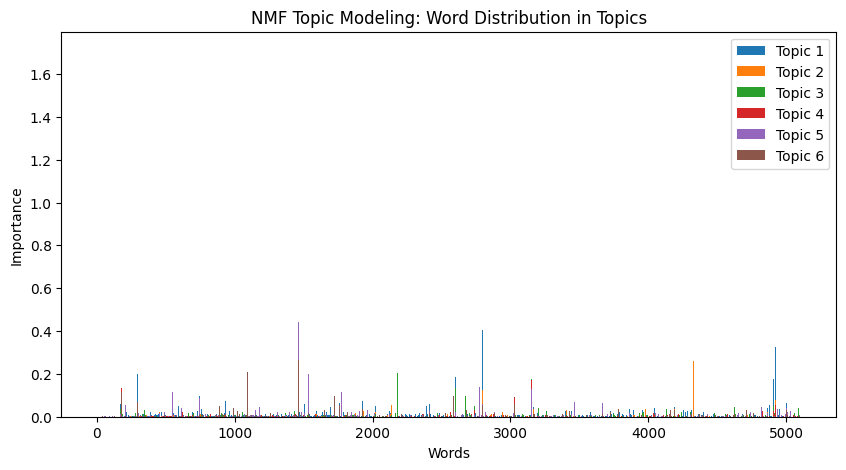

In [ ]:
# 绘制主题的词频分布（可以视化每个主题与词汇的关系）
plt.figure(figsize=(10, 5))
for topic_idx, topic in enumerate(nmf.components_):
    plt.bar(range(len(topic)), topic, label=f"Topic {topic_idx + 1}")

plt.title("NMF Topic Modeling: Word Distribution in Topics")
plt.xlabel("Words")
plt.ylabel("Importance")
plt.legend()
plt.show()

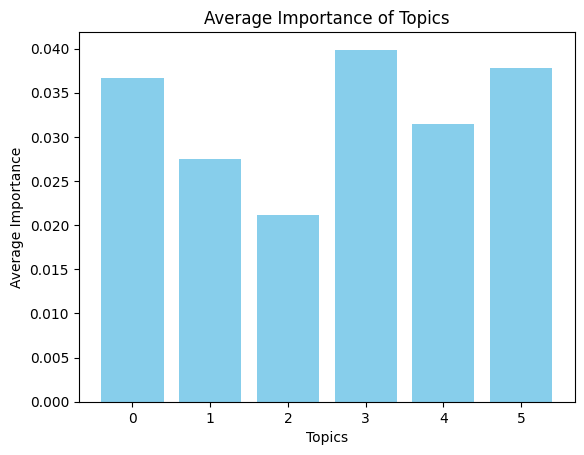

In [ ]:
# 计算每个主题的占比
topic_weights = nmf.transform(tfidf_matrix).mean(axis=0)
plt.bar(range(n_topics), topic_weights, color='skyblue')
plt.xlabel('Topics')
plt.ylabel('Average Importance')
plt.title('Average Importance of Topics')
plt.show()

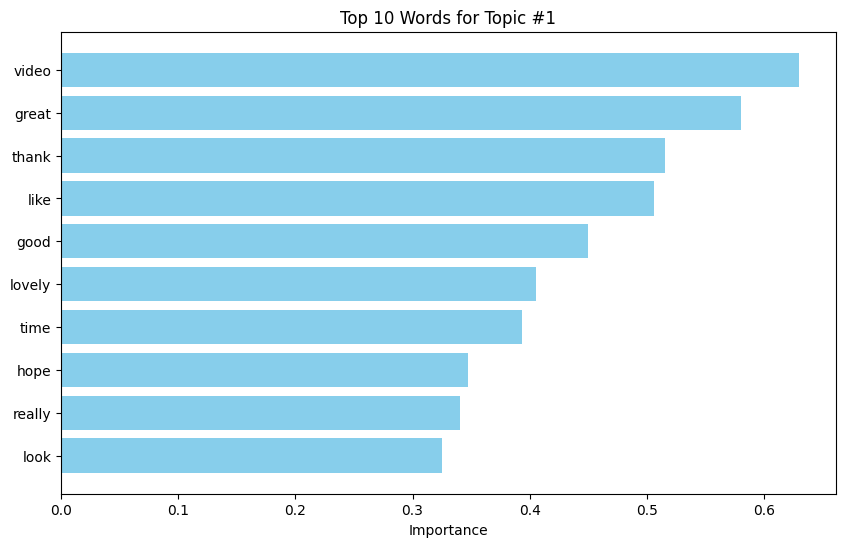

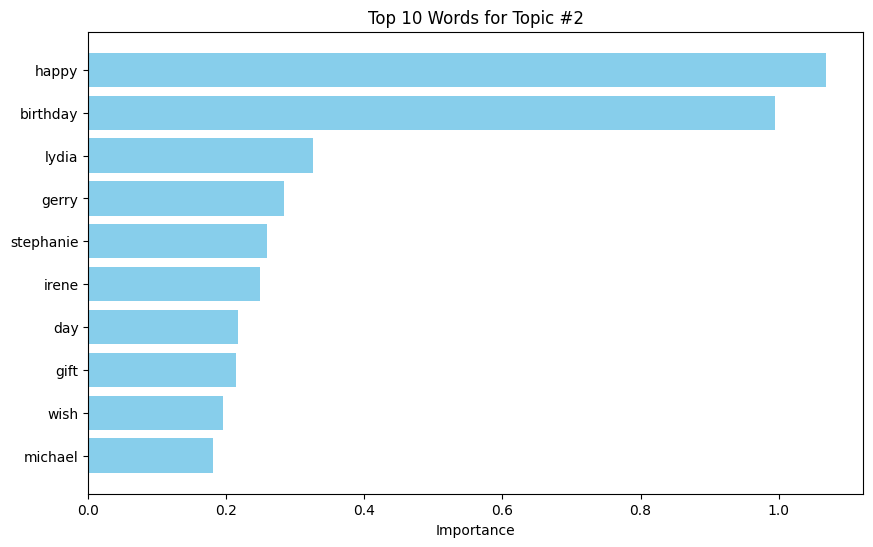

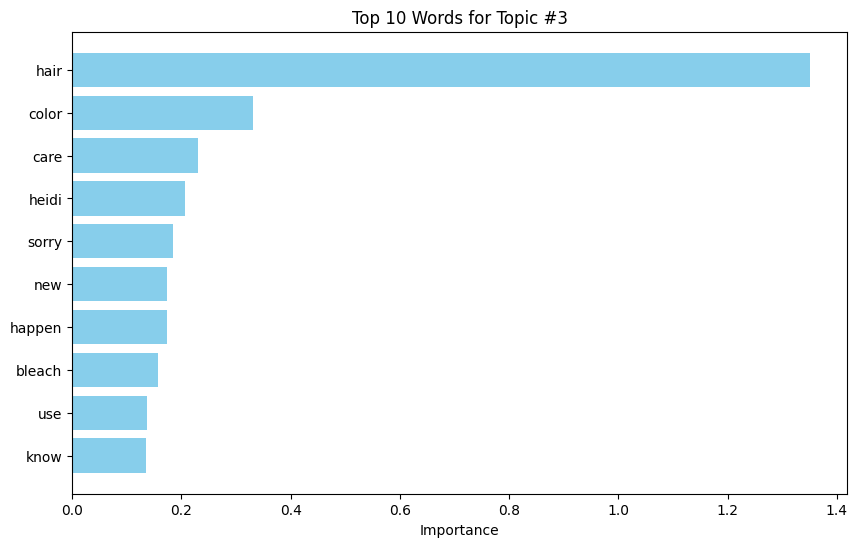

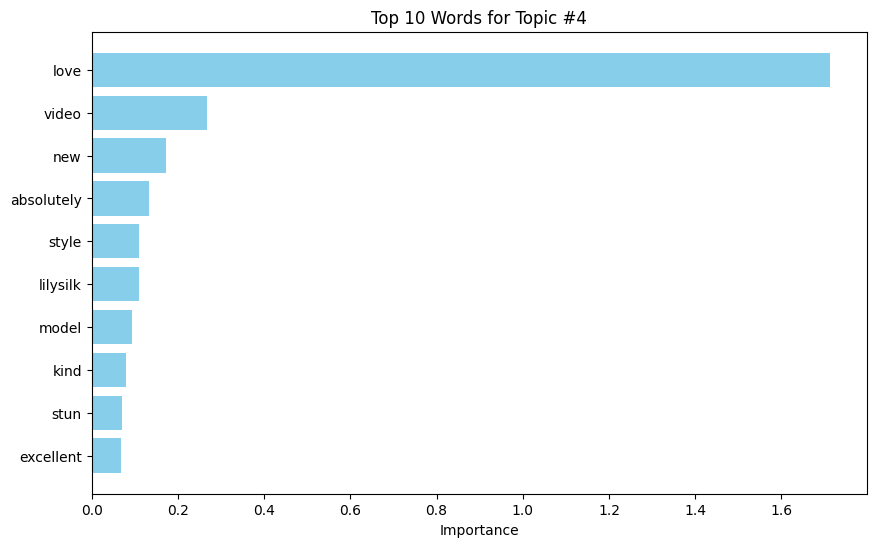

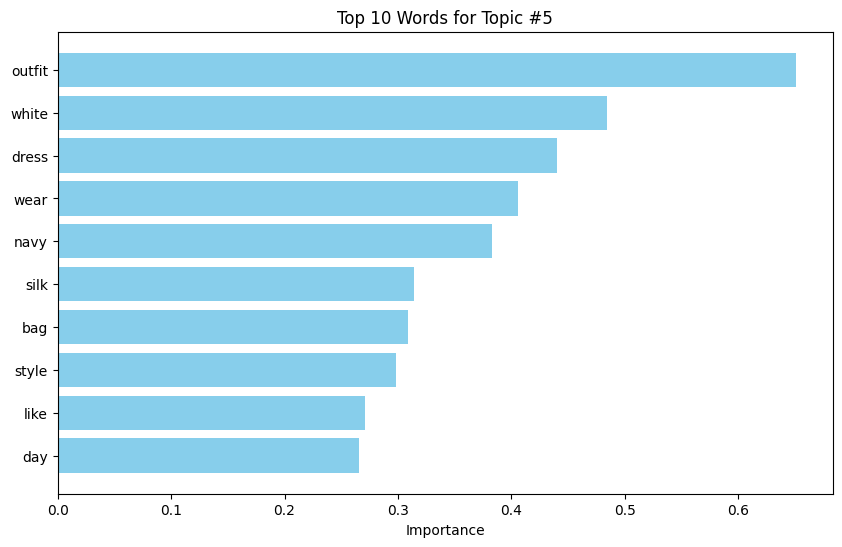

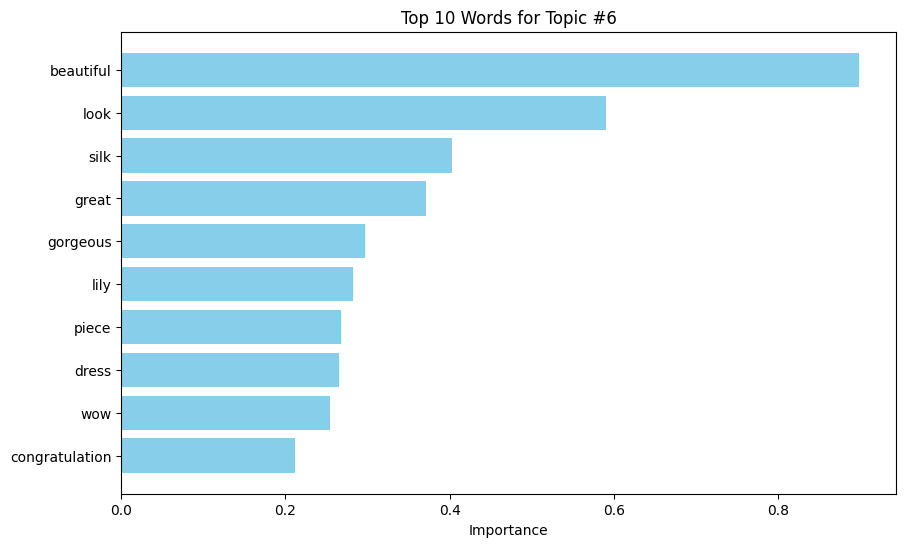

In [ ]:
# 绘制每个主题的前 10 个重要词汇
for topic_idx, topic in enumerate(nmf.components_):
    plt.figure(figsize=(10, 6))
    top_words_idx = topic.argsort()[:-11:-1]
    top_words = [feature_names[i] for i in top_words_idx]
    top_word_weights = topic[top_words_idx]

    plt.barh(top_words, top_word_weights, color='skyblue')
    plt.xlabel('Importance')
    plt.title(f"Top 10 Words for Topic #{topic_idx + 1}")
    plt.gca().invert_yaxis()
    plt.show()

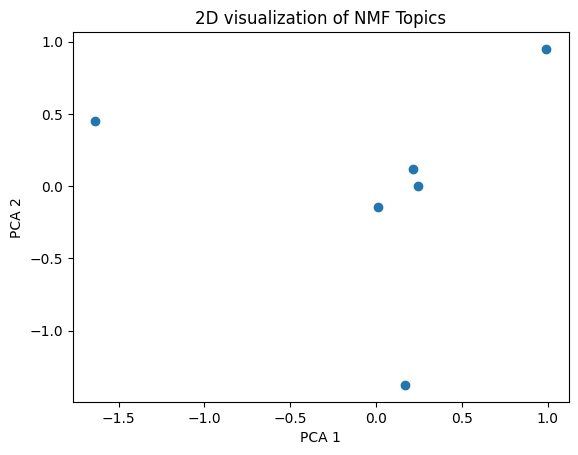

In [ ]:
from sklearn.decomposition import PCA

# 用 PCA 降维
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(nmf.components_)

# 绘制散点图
plt.scatter(reduced_data[:, 0], reduced_data[:, 1])
plt.title("2D visualization of NMF Topics")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()

从这张 PCA 可视化 的图表来看，模型在将 NMF 主题进行降维处理后，显示出了 非常明显的分离，这表明：不同主题之间的差异较大：在二维空间中，每个点代表一个主题，并且这些点之间的距离较远，意味着这些主题在数据中是高度分离的。可能表明每个主题有明显的区分特征。【可能要特殊处理跟我们想分析的内容相关的stopwords】